In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define computational domain size
Nx, Ny, Nz = 20, 20, 20  # Grid size
resolution = 10  # Grid resolution (points per unit length)

dx = 1/resolution # 0.1
dt = 1/(2*resolution) # 0.05

# Create a 3D computational cell
cell_size = mp.Vector3(Nx, Ny, Nz)

# Define a Gaussian point source at the center
wavelength = 1.0  # Central wavelength
freq = 1 / wavelength  # Frequency
source = mp.Source(
    # src=mp.GaussianSource(frequency=freq, fwidth=0.2 * freq),
    src=mp.ContinuousSource(frequency=freq, fwidth=0.2 * freq),
    component=mp.Ex,  
    center=mp.Vector3(0, 0, 0)  # Positioned at the center
)

In [3]:
# Set up the simulation with vacuum and a single source
sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    sources=[source],
    boundary_layers=[mp.PML(1.0)],  # Absorbing boundaries to avoid reflections
)

In [4]:
vals = []

def get_slice(sim):
    vals.append(sim.get_array(center=mp.Vector3(0, 0, 0), size=mp.Vector3(Nx, Ny, 0), component=mp.Ex))

total_time = 20
time_interval = 2

sim.run(mp.at_every(time_interval, get_slice),
        until=total_time)



-----------
Initializing structure...
time for choose_chunkdivision = 0.000201941 s
Working in 3D dimensions.
Computational cell is 20 x 20 x 20 with resolution 10
time for set_epsilon = 6.49193 s
-----------
Meep progress: 0.05/20.0 = 0.2% done in 5.5s, 2184.5s to go
on time step 1 (time=0.05), 5.47513 s/step
Meep progress: 2.45/20.0 = 12.2% done in 9.5s, 67.9s to go
on time step 49 (time=2.45), 0.083417 s/step
Meep progress: 4.8500000000000005/20.0 = 24.2% done in 13.5s, 42.1s to go
on time step 97 (time=4.85), 0.0834155 s/step
Meep progress: 7.300000000000001/20.0 = 36.5% done in 17.6s, 30.6s to go
on time step 146 (time=7.3), 0.0832976 s/step
Meep progress: 9.700000000000001/20.0 = 48.5% done in 21.6s, 22.9s to go
on time step 194 (time=9.7), 0.0835168 s/step
Meep progress: 12.100000000000001/20.0 = 60.5% done in 25.6s, 16.7s to go
on time step 242 (time=12.1), 0.0835011 s/step
Meep progress: 14.5/20.0 = 72.5% done in 29.6s, 11.2s to go
on time step 290 (time=14.5), 0.0833386 s/ste

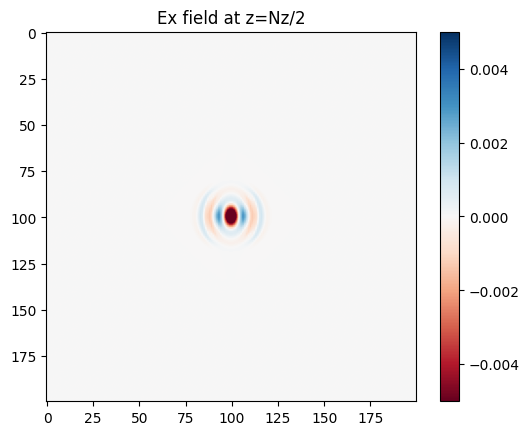

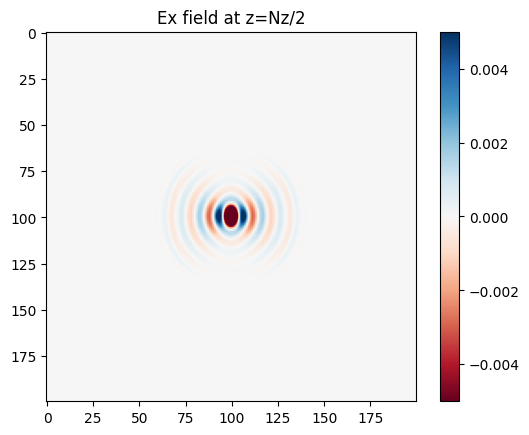

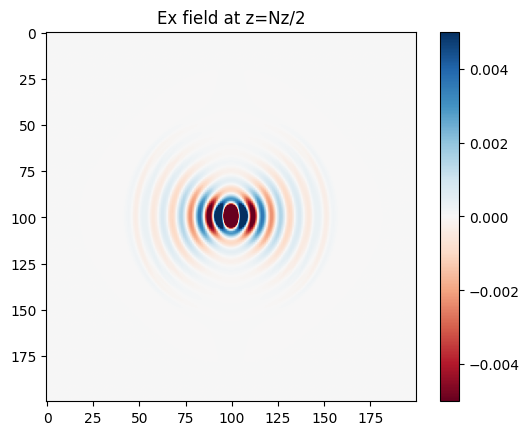

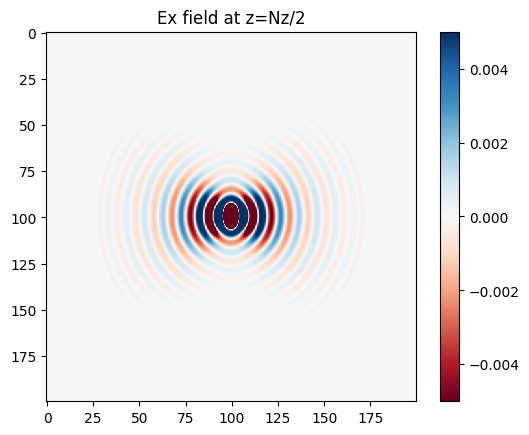

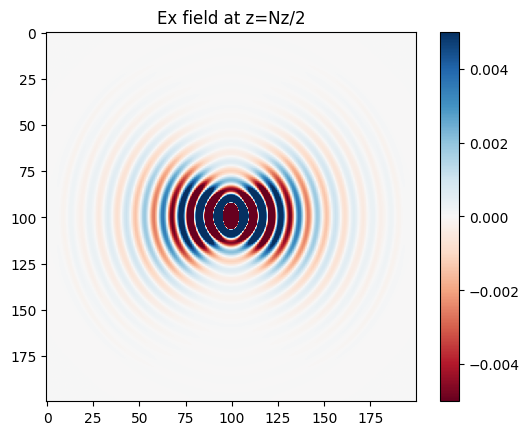

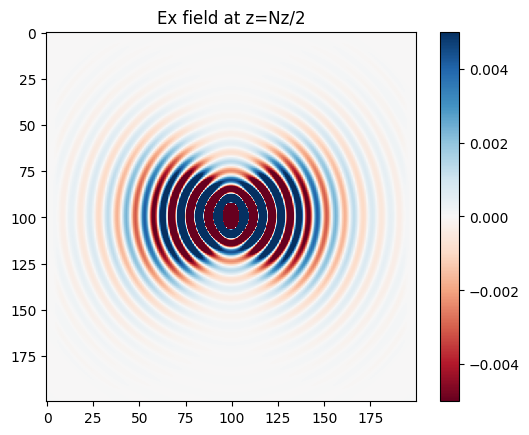

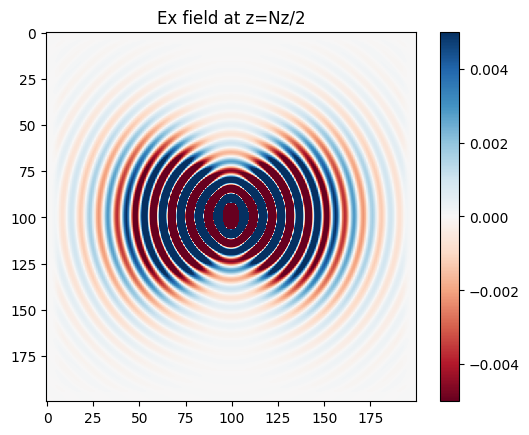

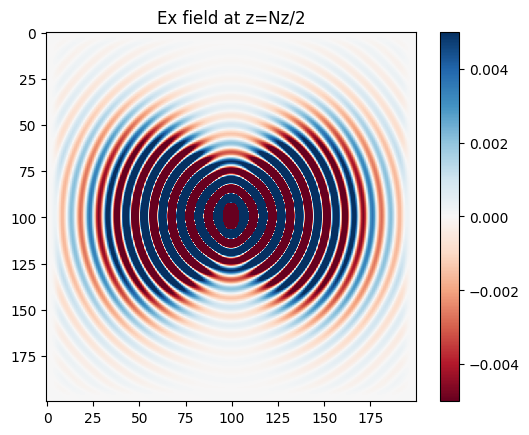

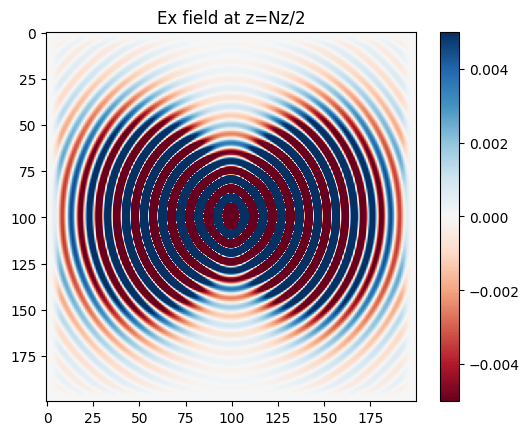

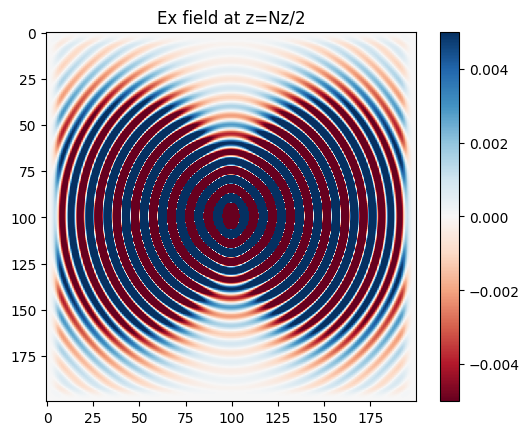

In [12]:
import matplotlib.pyplot as plt

plt.figure()
for i in range(int(total_time/time_interval)):
    plt.imshow(vals[i], cmap='RdBu', vmin = -0.005, vmax = 0.005)
    plt.colorbar()
    plt.title("Ex field at z=Nz/2")
    plt.show()

In [6]:
len(vals)

10

In [7]:
# Run the simulation
# sim.run(until=20)

In [8]:
#eps_data = sim.get_array(center=mp.Vector3(0, 0, 0), size=mp.Vector3(Nx, Ny, 0), component=mp.Ex)
#plt.imshow(eps_data.transpose(), cmap='RdBu', interpolation='spline36', vmin = -0.2, vmax = 0.2)
#plt.colorbar()
#plt.title("Ex field at z=Nz/2")
#plt.show()